In [1]:
import numpy as np
import pandas as pd
import os

import warnings
warnings.filterwarnings('ignore')
from pylab import rcParams



In [2]:
os.chdir('C:/Users/ybyad/Desktop/prject')

In [3]:
data=pd.read_csv('googleplaystore.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null int64
Size              10841 non-null object
Installs          10841 non-null float64
Type              10840 non-null object
Price             10841 non-null float64
Content Rating    10841 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(3), int64(1), object(9)
memory usage: 1.1+ MB


In [5]:
data.dropna(inplace = True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 13 columns):
App               9360 non-null object
Category          9360 non-null object
Rating            9360 non-null float64
Reviews           9360 non-null int64
Size              9360 non-null object
Installs          9360 non-null float64
Type              9360 non-null object
Price             9360 non-null float64
Content Rating    9360 non-null object
Genres            9360 non-null object
Last Updated      9360 non-null object
Current Ver       9360 non-null object
Android Ver       9360 non-null object
dtypes: float64(3), int64(1), object(9)
memory usage: 1023.8+ KB


In [7]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [8]:
data['Rating'] = data['Rating'].astype(str).astype(float)

In [9]:
data['Reviews'] = data['Reviews'].astype(float)

In [10]:
#Cleaning no of installs classification
#data['Installs'] = [int(i[:-1].replace(',','')) for i in data['Installs']]
data.columns=data.columns.str.replace(' ','')

In [11]:
data = data[data['Installs'] != 'Free']
data = data[data['Installs'] != 'Paid']
data['Installs'] = data['Installs'].apply(lambda x: x.replace('+', '') if '+' in str(x) else x)
data['Installs'] = data['Installs'].apply(lambda x: x.replace(',', '') if ',' in str(x) else x)
data['Installs'] = data['Installs'].apply(lambda x: int(x))

In [12]:
data['Price'] = data['Price'].apply(lambda x: str(x).replace('$', '') if '$' in str(x) else str(x))
data['Price'] = data['Price'].apply(lambda x: float(x))

In [13]:
#data.drop(data[(data['App'] == 'HOUSE_AND_HOME')].index, inplace=True)
#data.drop(data[(data['App'] == 'AUTO_AND_VEHICLES')].index, inplace=True)
#data.drop(data[(data['App'] == 'LIBRARIES_AND_DEMO')].index, inplace=True)
#data.drop(data[(data['App'] == 'NEWS_AND_MAGAZINES')].index, inplace=True)
#data.drop(data[(data['App'] == 'TRAVEL_AND_LOCAL')].index, inplace=True)
#data.drop(data[(data['App'] == 'BOOKS_AND_REFERENCE')].index, inplace=True)
#data.drop(data[(data['App'] == 'ART_AND_DESIGN')].index, inplace=True)
#data.drop(data[(data['App'] == 'HEALTH_AND_FITNESS')].index, inplace=True)
#data.drop(data[(data['App'] == 'MEDICAL')].index, inplace=True)
#data.drop(data[(data['App'] == 'DATING')].index, inplace=True)
#data.drop(data[(data['App'] == 'WEATHER')].index, inplace=True)
#data.drop(data[(data['App'] == 'EVENTS')].index, inplace=True)

In [14]:
data['Size'] = data['Size'].apply(lambda x: str(x).replace('Varies with device', 'NaN') if 'Varies with device' in str(x) else x)
data['Size'] = data['Size'].apply(lambda x: str(x).replace('M', '') if 'M' in str(x) else x)
data['Size'] = data['Size'].apply(lambda x: str(x).replace(',', '') if 'M' in str(x) else x)
data['Size'] = data['Size'].apply(lambda x: float(str(x).replace('k', '')) / 1000 if 'k' in str(x) else x)
data['Size'] = data['Size'].apply(lambda x: float(x))

In [15]:
avg_rate = data.groupby('Category', as_index=False)['Rating'].mean()

In [16]:
import sys
!conda install --yes --prefix {sys.prefix} plotly

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\ybyad\AppData\Local\Continuum\anaconda3

  added / updated specs:
    - plotly


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    plotly-4.2.1               |             py_0         4.1 MB
    retrying-1.3.3             |           py37_2          16 KB
    ------------------------------------------------------------
                                           Total:         4.1 MB

The following NEW packages will be INSTALLED:

  plotly             pkgs/main/noarch::plotly-4.2.1-py_0
  retrying           pkgs/main/win-64::retrying-1.3.3-py37_2




retrying-1.3.3       | 16 KB     |            |   0% 
retrying-1.3.3       | 16 KB     | #########9 |  99% 
retrying-1.3.3       | 16 KB     | ########## | 100% 

plotly-4.2.1         | 4.1 MB    |            |   0% 
plotly-4.2.1         | 4.1 MB    |

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

%matplotlib inline

from plotly import tools
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go

In [19]:
avg_rate_data = [go.Histogram(
        x = data.Rating,
        xbins = {'start': 1, 'size': 0.1, 'end' :5}
)]

print('Average app rating:', np.mean(data['Rating']))
py.offline.iplot(avg_rate_data, filename='rating_dist')

Average app rating: 4.191837606837612


In [20]:
def box_plot(datas):
    traces = []
    a = avg_rate['Category'].tolist()
    for i in range(33):
        y = np.array(datas[datas['Category'] == a[i]].Rating)
        trace = go.Box(
                    y=y,
                    name = a[i]
                )
        traces.append(trace)
    layout = go.Layout(
    title='',
    xaxis=dict(
        title='',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        
        )
    )
)    
    data_avg_rating = traces
    fig = go.Figure(data=data_avg_rating, layout=layout)
    plot_url = py.iplot(fig, filename='avg_rating-plot')


In [21]:
box_plot(data)

Text(0.5, 1.0, 'Number of Apps in each category')

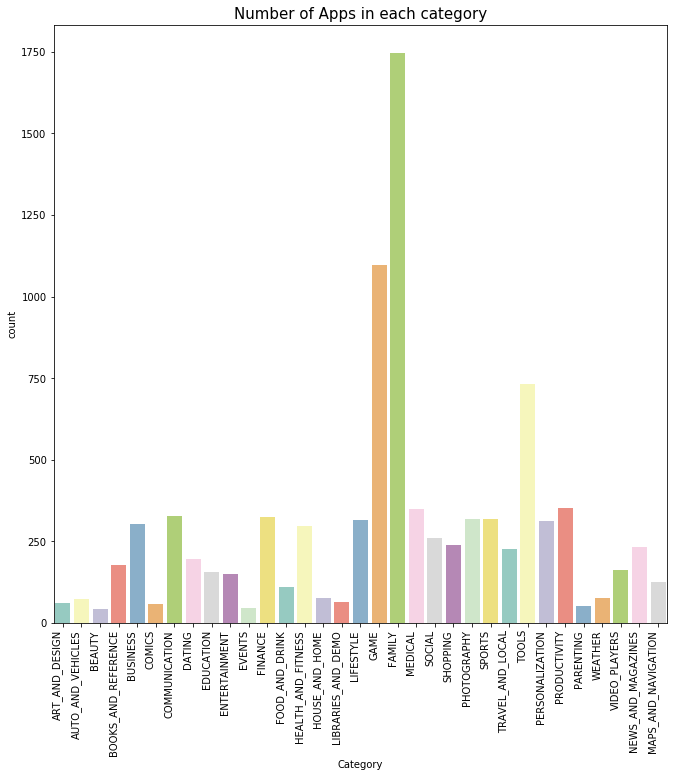

In [22]:
rcParams['figure.figsize'] = 11,11
cat_cnt = sns.countplot(x="Category",data=data, palette = "Set3")
cat_cnt.set_xticklabels(cat_cnt.get_xticklabels(), rotation=90, ha="right")
cat_cnt
plt.title('Number of Apps in each category',size = 15)

In [23]:
no_reviews = data.groupby('Category', as_index=False)['Reviews'].sum()
most_space = data.groupby('Category', as_index=False)['Size'].sum().sort_values(by='Size', ascending=False)

best_cat = data.groupby('Category', as_index=False)['Installs'].sum()

In [24]:
#Category with the Most Reviews, Most Space Consumption and Most Installations
from plotly import tools
import plotly.offline as py
import plotly.graph_objs as go

data_pie = [go.Pie(
        labels = no_reviews['Category'].tolist(),
        values = no_reviews['Reviews'].tolist(),
        hoverinfo = 'label+value',
        name= 'Reviews by Category'
    
)]

py.offline.iplot(data_pie, filename='active_category')

data_size_pie = [go.Pie(
        labels = most_space['Category'].tolist(),
        values = most_space['Size'].tolist(),
        hoverinfo = 'label+value',
        name = 'x'
    
)]

py.offline.iplot(data_size_pie, filename='active_category')

data_cat_pie = [go.Pie(
        labels = best_cat['Category'].tolist(),
        values = best_cat['Installs'].tolist(),
        hoverinfo = 'label+value',
        name='y'
    
)]

py.offline.iplot(data_cat_pie, filename='active_category')

In [ ]:
#While Gaming Apps have the Most reviews & Installations, family apps consume more spaces in Google play.

In [25]:
#correlation
relate = data.corr()

In [26]:
import plotly.graph_objs as go

trace = go.Heatmap(z=[relate.Rating.values.tolist(), relate.Reviews.values.tolist(), relate.Size.values.tolist(), relate.Installs.values.tolist(), relate.Price.values.tolist()],
                   x=[relate.columns[0], relate.columns[1], relate.columns[2], relate.columns[3], relate.columns[4]],
                   y=[relate.columns[0], relate.columns[1], relate.columns[2], relate.columns[3], relate.columns[4]])
data_cor=[trace]
py.iplot(data_cor, filename='corr-heatmap')

In [ ]:
#Clearly, reviews and no. of installs are correlated to an extent

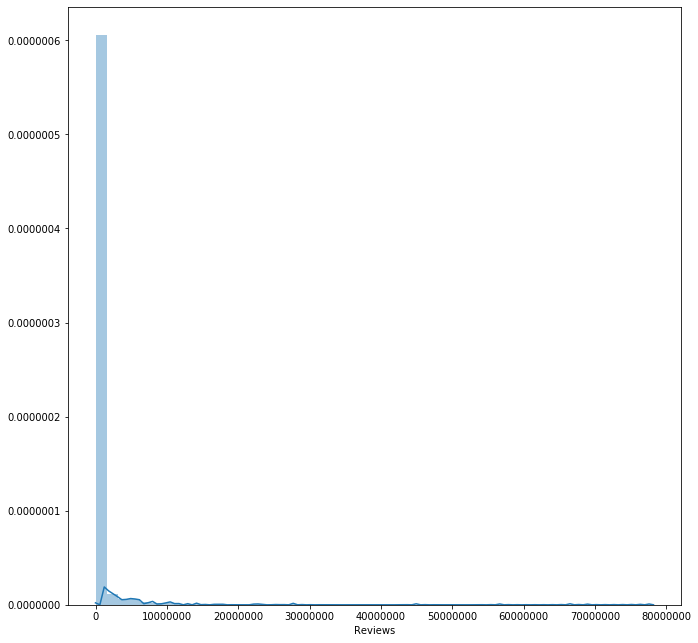

In [27]:
#Distribution of Reviews
rcParams['figure.figsize'] = 11,11
plt.ticklabel_format(style='plain', axis='x',useOffset=False)
plt.ticklabel_format(style='plain', axis='y',useOffset=False)

ax = sns.distplot(data['Reviews'], kde=True)
ax

In [28]:
#Free vs Paid Apps - Ratings & Size
import plotly.graph_objs as go

x0 = data[data['Type'] == 'Free']['Rating']
x1 = data[data['Type'] == 'Paid']['Rating']

trace0 = go.Box(
    x=x0,
    name='Free'
)
trace1 = go.Box(
    x=x1,
    name='Paid'
)
data_type_rating = [trace0, trace1]
py.iplot(data_type_rating)

y0 = data[data['Type'] == 'Free']['Size']
y1 = data[data['Type'] == 'Paid']['Size']

trace0 = go.Box(
    y=y0,
    name='Free'
)
trace1 = go.Box(
    y=y1,
    name='Paid'
)
data_type_rating = [trace0, trace1]
py.iplot(data_type_rating)

In [29]:
#How is size impacting the app rating ?
trace0 = go.Scatter(
    x=data[data['Type']=='Free']['Rating'],
    y=data[data['Type']=='Free']['Size'],
   name='Free',
   mode = 'markers',
    marker = dict(
        size = 10,
        color = 'rgba(152, 0, 0, .8)',
        line = dict(
            width = 2,
            color = 'rgb(0, 0, 0)'
        )
   )
)
trace1 = go.Scatter(
    x = data[data['Type']=='Paid']['Rating'],
    y = data[data['Type']=='Paid']['Size'],
    name='Paid',
    mode = 'markers',
    marker = dict(
        size = 10,
        color = 'rgba(255, 182, 193, .9)',
        line = dict(
            width = 2,
        )
   )
)
layout = dict(title = 'Size Vs Rating',
              yaxis = dict(zeroline = False, title='Size'),
              xaxis = dict(zeroline = False, title='Rating')
             )

data_sc = [trace0, trace1]

fig = dict(data=data_sc, layout=layout)
py.iplot(fig, filename='size-scatter')

In [ ]:
#The points are more dense at the lower bottom-right, meaning, less sized apps have higher ratings

Text(0.5, 1.0, 'Reviews Vs Ratings for an App')

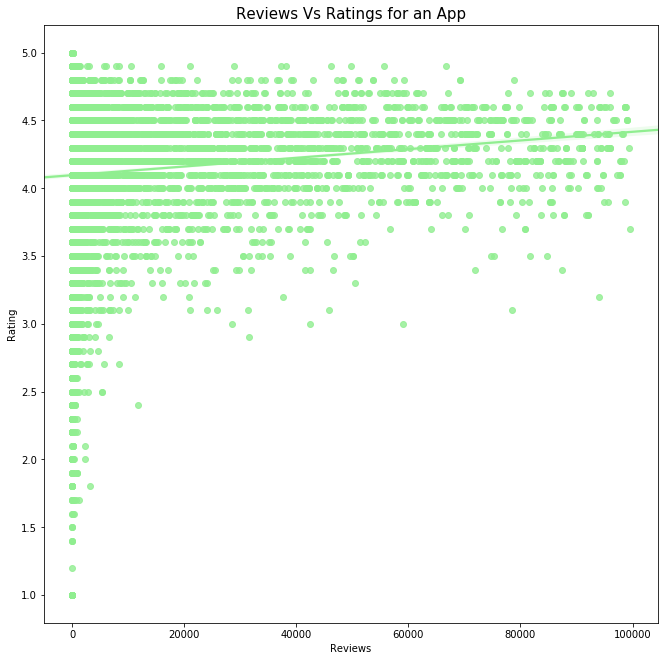

In [31]:
#Reviews vs Ratings
plt.figure(figsize = (11,11))
sns.regplot(x="Reviews", y="Rating", color = 'lightgreen',data=data[data['Reviews']<100000]);
plt.title('Reviews Vs Ratings for an App',size = 15)

In [ ]:
#lesser the review lesser will be the rating

In [32]:
#Percent of Free and Paid Apps in the play store
from plotly import tools
import plotly.offline as py
import plotly.graph_objs as go

# Data to plot
labels = data['Type'].value_counts(sort = True).index
values = data['Type'].value_counts(sort = True)

data_pie1 = [go.Pie(
        labels = labels.tolist(),
        values = values.tolist(),
        hoverinfo = 'label+value',
        name= ''
    
)]

py.offline.iplot(data_pie1, filename='active_category1')

In [34]:
#Free vs Paid - Average Size
avg_size=data.groupby('Type', as_index=False)['Size'].mean()

In [35]:
import plotly.figure_factory as ff

data_bul = (
  {"label": "Free", "range": [1, 50, 100], "performance": [20,50], "point": [21.7]},
  {"label": "Paid", "range": [1, 50, 100], "performance": [20,50],"point": [19.3]}
)
measure_colors=['rgb(63,102,153)', 'rgb(120,194,195)']
range_colors=['rgb(245,225,218)', 'rgb(241,241,241)']

fig = ff.create_bullet(
    data_bul, titles='label', markers='point', measures='performance', title='Average Size in MB of free and paid apps',
    ranges='range', orientation='v', range_colors=range_colors, width=800,measure_colors=measure_colors
)
py.iplot(fig, filename='bulletchart_size')

C:\Users\ybyad\AppData\Local\Continuum\anaconda3\lib\site-packages\plotly\tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



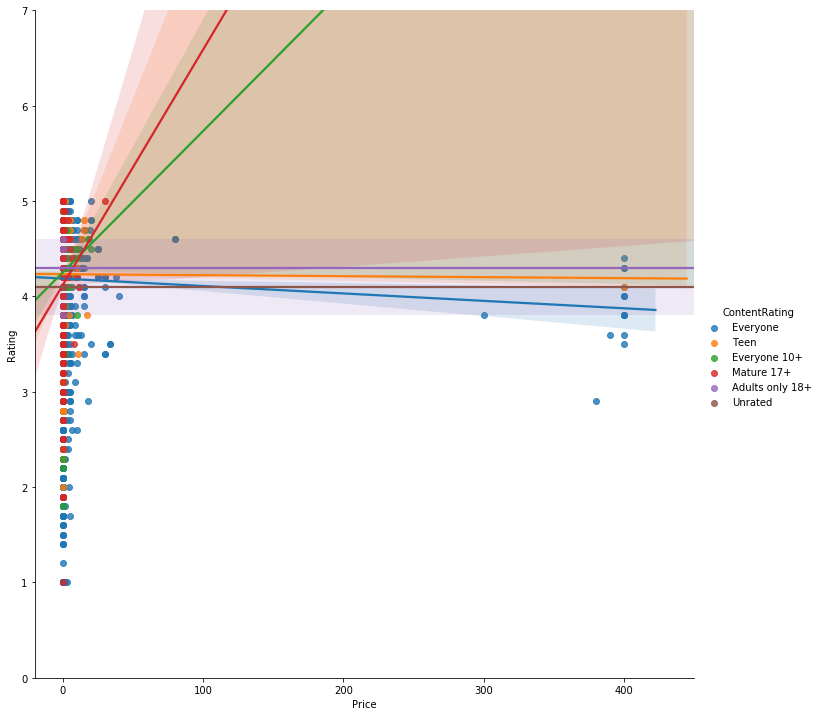

In [38]:
#Does high Price impact Ratings?
import seaborn as sns
ax = sns.lmplot(x="Price", y="Rating", hue = 'ContentRating', data=data, size = 10)
ax.set(xlim=(-20, 450))
ax.set(ylim=(0, 7))
plt.show()

In [39]:
#Most high rated apps are free(of course), but for the paid apps,
#the high rated are mostly < 100 dollars and a few above 200 dollars.